In [1]:
import grpc
import yolo_pb2
import yolo_pb2_grpc
import cv2
from scipy.io import savemat
from IPython.display import display
from PIL import Image
from IPython.display import display
from io import BytesIO

### If grpc versions are different compile yolo_pb2 and yolo_pb2_grpc 

python -m grpc_tools.protoc -I. -I../protos --python_out=. --grpc_python_out=. yolo.proto

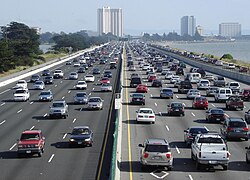

In [2]:
with open("/workspaces/boxes/Images/test.jpg", "rb") as f:
    img_bytes = f.read()
image = Image.open(BytesIO(img_bytes))
display(image)



In [10]:

channel = grpc.insecure_channel('Mac.Home:8062')
stub = yolo_pb2_grpc.YOLOserviceStub(channel)

response = stub.Detect(yolo_pb2.YOLORequest(yolo_config="merda",image=img_bytes))
channel.close()

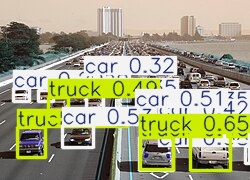

[{"bbox": [190.72613525390625, 132.9693145751953, 230.57394409179688, 170.54583740234375], "confidence": 0.6498748064041138, "class_id": 7}, {"bbox": [62.51911163330078, 125.51972961425781, 93.6245346069336, 147.49169921875], "confidence": 0.5292651653289795, "class_id": 2}, {"bbox": [135.45492553710938, 107.20153045654297, 155.50628662109375, 124.30120086669922], "confidence": 0.5072054862976074, "class_id": 2}, {"bbox": [48.25815200805664, 97.7321548461914, 68.97933959960938, 119.09174346923828], "confidence": 0.4893912374973297, "class_id": 7}, {"bbox": [224.9206085205078, 117.79327392578125, 249.74398803710938, 141.2417449951172], "confidence": 0.4219628572463989, "class_id": 2}, {"bbox": [17.180908203125, 127.71320343017578, 45.56999206542969, 157.1880340576172], "confidence": 0.4155009984970093, "class_id": 7}, {"bbox": [140.3086700439453, 137.37745666503906, 173.37356567382812, 169.86859130859375], "confidence": 0.40215960144996643, "class_id": 7}, {"bbox": [245.18194580078125, 

In [11]:
image = Image.open(BytesIO(response.labeled_image))
display(image)
print(response.detections_json)

In [6]:
with open("output.jpg","wb") as f:
    f.write(response.labeled_image)
detections=eval(response.detections_json)
savemat("detections2.mat",{"detections":detections})



### Tracking 

In [24]:
# Read image and encode as bytes
img = cv2.imread("../../Images/eiffel.png")
_,img_encoded = cv2.imencode('.jpg', img)
img_bytes = img_encoded.tobytes()

channel = grpc.insecure_channel('localhost:8061')
stub = yolo_pb2_grpc.YOLOserviceStub(channel)
comms=json.dumps([{"reset":1},{"conf":0.2}])
response = stub.Track(yolo_pb2.YOLOTrackRequest(image=img_bytes,track_config_json=comms))
#channel.close()


### One argument only

In [23]:
# Read image and encode as bytes
img = cv2.imread("../../Images/eiffel.png")
_,img_encoded = cv2.imencode('.jpg', img)
img_bytes = img_encoded.tobytes()
channel = grpc.insecure_channel('localhost:8061')
stub = yolo_pb2_grpc.YOLOserviceStub(channel)
response = stub.Track(yolo_pb2.YOLOTrackRequest(image=img_bytes))
#channel.close()


In [ ]:
import ultralytics
import cv2

arg={"source":"../../Images/eiffel.png","conf":0.2}
m=ultralytics.YOLO("yolo11n.pt")
r=m(**arg)



image 1/1 /workspaces/boxes/yologpt/test/../../Images/eiffel.png: 384x640 4 persons, 58.4ms
Speed: 1.1ms preprocess, 58.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
